# 15 UNDERSTANDING EXPERIMENTAL DATA

This chapter is all about <b>understanding experimental data</b>. 

We will make extensive use of plotting to visualize the data, and will return to the topic of what is and what is not a valid statistical conclusion. We will also talk about the interplay between physical and computational experiments.

## 15.2 The Behavior of Projectiles

We decided to use one of our springs to build a device capable of launching a projectile.

We measured <b>the height of the projectile at various distances from the launch point</b>.

The data was stored in a file **'./src/projectileData.txt'** with the contents

```
      Distance trial1  trial2 trial3  trial4
      1080     0        0      0       0
      1044     2.25     3.25   4.5     6.5
      
      
      0        0        0       0       0
```


In [ ]:
# %load './src/projectileData.txt'
Distance  	trial1	trial2	trial3	trial3	
1080	  	0.0	    0.0		0.0		0.0
1044		2.25	3.25	4.5		6.5	
1008		5.25	6.5		6.5		8.75
972			7.5		7.75	8.25	9.25
936			8.75	9.25	9.5		10.5
900			12.0	12.25	12.5	14.75
864			13.75	16.0	16.6	16.5
828			14.75	15.25	15.5	17.5
792			15.5	16.0	16.6	16.75
756			17.0	17.0	17.5	19.25
720			17.5	18.5	18.5	19.0
540			19.5	18.5	19.0	19.0
360			18.5	18.5	19.0	19.0
180			13.0	13.0	13.0	13.0
0			0.0		0.0		0.0		0.0


The code in Figure 15.4 was used to plot the **mean altitude of the projectile(Y)** against the **distance from the point of launch(X)**.

It also plots the best linear and quadratic fits to the points.

In [1]:
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

In [2]:
fileName='./src/projectileData.txt'
distances, heights = getTrajectoryData(fileName)

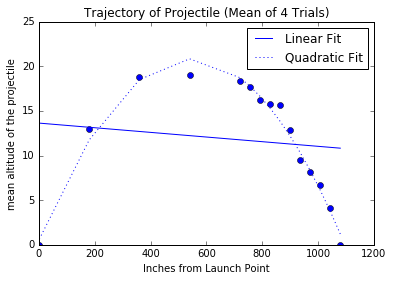

In [4]:
#Page 215, Figure 15.4
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def processTrajectories(distances, heights):
    numTrials = len(heights)
    distances = np.array(distances)
    
    #Get array containing mean height at each distance
    totHeights =np.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights +np.array(h)
    meanHeights = totHeights/len(heights)
    
    plt.title('Trajectory of Projectile (Mean of '\
                + str(numTrials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('mean altitude of the projectile')
    plt.plot(distances, meanHeights, 'bo')
    
    a,b = np.polyfit(distances, meanHeights, 1)
  
    altitudes = a*distances + b
    plt.plot(distances, altitudes, 'b', label = 'Linear Fit')
    
    a,b,c = np.polyfit(distances, meanHeights, 2)
 
    altitudes = a*(distances**2) +  b*distances + c
    plt.plot(distances, altitudes, 'b:', label = 'Quadratic Fit')
    plt.legend()

processTrajectories(distances, heights)

In [ ]:
%load './src/projectileData.txt'

In [5]:
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    d2hs=[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        dh = line.split()
        d2h={'d':None,'h':[]}
        d2h['d']=float(dh[0])
        trials=len(dh)-1
        for i in range(trials):
            d2h['h'].append(float(dh[i+1]))
        d2hs.append(d2h)
    dataFile.close()
    return  d2hs,trials

In [6]:
fileName='./src/projectileData.txt'
d2hs,trials = getTrajectoryData(fileName)
for item in d2hs:
    print(item)
  

{'h': [0.0, 0.0, 0.0, 0.0], 'd': 1080.0}
{'h': [2.25, 3.25, 4.5, 6.5], 'd': 1044.0}
{'h': [5.25, 6.5, 6.5, 8.75], 'd': 1008.0}
{'h': [7.5, 7.75, 8.25, 9.25], 'd': 972.0}
{'h': [8.75, 9.25, 9.5, 10.5], 'd': 936.0}
{'h': [12.0, 12.25, 12.5, 14.75], 'd': 900.0}
{'h': [13.75, 16.0, 16.6, 16.5], 'd': 864.0}
{'h': [14.75, 15.25, 15.5, 17.5], 'd': 828.0}
{'h': [15.5, 16.0, 16.6, 16.75], 'd': 792.0}
{'h': [17.0, 17.0, 17.5, 19.25], 'd': 756.0}
{'h': [17.5, 18.5, 18.5, 19.0], 'd': 720.0}
{'h': [19.5, 18.5, 19.0, 19.0], 'd': 540.0}
{'h': [18.5, 18.5, 19.0, 19.0], 'd': 360.0}
{'h': [13.0, 13.0, 13.0, 13.0], 'd': 180.0}
{'h': [0.0, 0.0, 0.0, 0.0], 'd': 0.0}


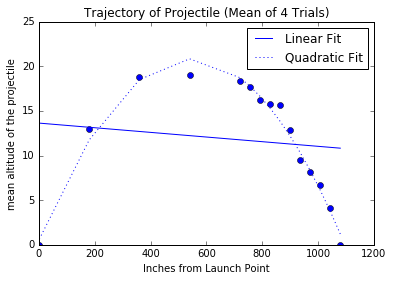

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def processTrajectories(d2hs,trials):
    numTrials = trials
    distances=[]
    meanHeights=[]
    for item in d2hs:
        distances.append(item['d'])
        meanHeights.append(np.mean(item['h']))
    
    plt.title('Trajectory of Projectile (Mean of '\
                + str(numTrials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('mean altitude of the projectile')
    plt.plot( distances, meanHeights, 'bo')
   
    a,b = np.polyfit(distances, meanHeights, 1)
    altitudes = a*np.array(distances) + b
    plt.plot(distances, altitudes, 'b', label = 'Linear Fit')
    
    a,b,c = np.polyfit(distances, meanHeights, 2)
 
    altitudes = a*(np.array(distances)**2) +  b*np.array(distances) + c
    plt.plot(distances, altitudes, 'b:', label = 'Quadratic Fit')
    plt.legend()

processTrajectories(d2hs,trials)